Include all the packages needed for this exercise as reported below

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import uproot
import pandas

Here it is an enumeration where are reported the sample id for each sample

In [2]:
class Samples:
    Signal_NonRes = -125
    Signal_Radion = [ -250, -260, -270, -280, -300, -320, -340, -350,
                      -400, -450, -500, -550, -600, -650, -750, -800, -900 ]
    Data = 0
    TT = 1
    DY = 2
    Wjets= 3
    SM_Higgs = 4
    other_bkg = 5

Open the file, called anaTuples, which are different for each channel. Then create a pandas DataFrame.

In [4]:
path = "/gpfs/ddn/cms/user/cmsdas/2019/hh_bbtautau/anaTuples/"
#path = "/Users/Tita/Desktop/Run2_analysis_hh_bbtautau/anaTuples/"
#path = "./anaTuples/"

samples = {'eTau': "eTau_tuple.root", 'muTau': "muTau_tuple.root", 'tauTau': "tauTau_tuple.root"} 
channel = "tauTau"

with uproot.open(path+samples[channel]) as file:
    tree = file[channel]
    df = tree.arrays('*', outputtype=pandas.DataFrame)

The aim of the exercise is to calculate the significance for each resonant sample, using different preselection:

* Requiring that we are in the signal region, that the two tau leptons should be opposite charge and they should isolated



17
mX = 250 GeV, sigma = 0.786348268139
mX = 260 GeV, sigma = 0.706799273689
mX = 270 GeV, sigma = 0.806226032088
mX = 280 GeV, sigma = 0.835368962602
mX = 300 GeV, sigma = 1.14735341021
mX = 320 GeV, sigma = 1.49039350782
mX = 340 GeV, sigma = 1.85582770975
mX = 350 GeV, sigma = 2.02259287517
mX = 400 GeV, sigma = 3.09608891459
mX = 450 GeV, sigma = 4.34215193991
mX = 500 GeV, sigma = 5.46612451564
mX = 550 GeV, sigma = 6.44964323671
mX = 600 GeV, sigma = 7.46356994166
mX = 650 GeV, sigma = 8.49626561174
mX = 750 GeV, sigma = 9.81470375555
mX = 800 GeV, sigma = 10.648507546
mX = 900 GeV, sigma = 11.5616008575


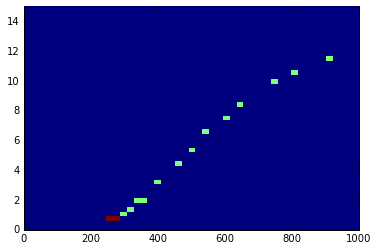

In [6]:
presel = (df.q_1 + df.q_2 == 0)

mX = np.array(Samples.Signal_Radion)
print(len(mX))
sigma = np.zeros(len(mX))

for n in range(len(mX)):
    n_s = np.sum(df[(df.sample_id == mX[n]) & presel].weight)
    n_b = np.sum(df[(df.sample_id > 0) & presel].weight)
    sigma[n] = n_s / math.sqrt(n_s + n_b)
    print('mX = {} GeV, sigma = {}'.format(-mX[n], sigma[n]))

bins_x = np.linspace(0, 1000, num=50)
bins_y = np.linspace(0, 15, num=50)
sigma_plt = plt.hist2d(-mX[:], sigma[:], bins=[bins_x,bins_y])
plt.show()

* In addition to the signal region, we should require and elliptical mass cut around the M_bb and M_tautau candidate, around 125 GeV (the measured mass of the Standard Higgs boson candidate)

mX = 250 GeV, sigma = 0.726969540969
mX = 260 GeV, sigma = 0.579169638863
mX = 270 GeV, sigma = 0.57934814168
mX = 280 GeV, sigma = 0.657846607762
mX = 300 GeV, sigma = 0.998709959201
mX = 320 GeV, sigma = 1.22723747933
mX = 340 GeV, sigma = 1.55594395498
mX = 350 GeV, sigma = 1.71883397882
mX = 400 GeV, sigma = 2.82822987737
mX = 450 GeV, sigma = 3.90764154977
mX = 500 GeV, sigma = 5.24142524851
mX = 550 GeV, sigma = 5.95675080322
mX = 600 GeV, sigma = 7.32192226329
mX = 650 GeV, sigma = 8.19699454173
mX = 750 GeV, sigma = 9.56780890937
mX = 800 GeV, sigma = 10.706809386
mX = 900 GeV, sigma = 11.9150402873


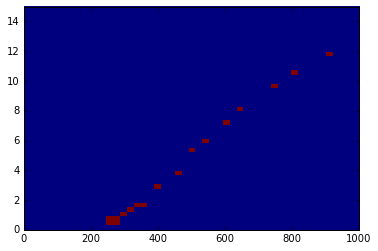

In [9]:
bb_cand_mass = df.m_bb
tt_cand_mass = df.m_sv

inside_ellipse = ((bb_cand_mass - 116.0) / 35.0)**2 + ((tt_cand_mass - 111.0) / 45.0) ** 2 < 1

sigma_mass_cut = np.zeros(len(mX))

for n in range(len(mX)):
    n_s = np.sum(df[(df.sample_id == mX[n]) & presel & inside_ellipse].weight)
    n_b = np.sum(df[(df.sample_id > 0) & presel & inside_ellipse].weight)
    sigma_mass_cut[n] = n_s / math.sqrt(n_s + n_b)
    print('mX = {} GeV, sigma = {}'.format(-mX[n], sigma_mass_cut[n]))
    
sigma_mass_cut_plt = plt.hist2d(-mX[:], sigma_mass_cut[:], bins=[bins_x,bins_y])
plt.show()

* As last point it should be added a different mass cut for the resonant candidate, to see how it changes the significance

mX = 250 GeV, sigma = 1.20277083505
mX = 260 GeV, sigma = 0.959474191968
mX = 270 GeV, sigma = 0.95976840651
mX = 280 GeV, sigma = 1.08906379585
mX = 300 GeV, sigma = 1.62563724661
mX = 320 GeV, sigma = 2.00917486417
mX = 340 GeV, sigma = 2.50847656063
mX = 350 GeV, sigma = 2.74924488815
mX = 400 GeV, sigma = 4.47668081364
mX = 450 GeV, sigma = 5.80702973448
mX = 500 GeV, sigma = 4.43506919602
mX = 550 GeV, sigma = 0.669179329309
mX = 600 GeV, sigma = 0.506722532168
mX = 650 GeV, sigma = 0.509108373748
mX = 750 GeV, sigma = 0.347172540404
mX = 800 GeV, sigma = 0.381289355714
mX = 900 GeV, sigma = 0.287405462801


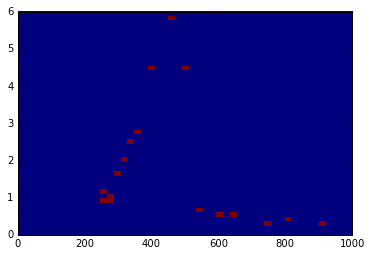

In [10]:
m_ttbb = df.m_ttbb_kinfit

mX_cut_low = m_ttbb > 250
mX_cut_high = m_ttbb < 500
mX_cut = mX_cut_low & mX_cut_high

sigma_mX_cut = np.zeros(len(mX))

for n in range(len(mX)):
    n_s = np.sum(df[(df.sample_id == mX[n]) & presel & inside_ellipse & mX_cut].weight)
    n_b = np.sum(df[(df.sample_id > 0) & presel & inside_ellipse & mX_cut].weight)
    sigma_mX_cut[n] = n_s / math.sqrt(n_s + n_b)
    print('mX = {} GeV, sigma = {}'.format(-mX[n], sigma_mX_cut[n]))
    
bins_y_new = np.linspace(0, 6, num=50)
sigma_mX_cut_plt = plt.hist2d(-mX[:], sigma_mX_cut[:], bins=[bins_x,bins_y_new])
plt.show()